In [ ]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/Users/oliverquinonez/118-Project')
from Functions import *


In [32]:

GBWA=np.load("GBWA_Output.npy")
GBNA = np.load("GBNA_Output.npy")
JWA = np.load('JWA_Output.npy')
JNA = np.load('JNA_Output.npy')

GBWA = GBWA[:,:,:,0]
GBNA = GBNA[:,:,:,0]
JWA = JWA[:,:,:,0]
JNA = JNA[:,:,:,0] 

In [4]:
PAr_int =np.linspace(0,1000,10)
PXe_int = np.array([10,25,50,75])

omega0 = 0.5e-2
b=k355*omega0**2
zR = b / 2     # [m] Rayleigh Range

b_int = np.array([f_to_b(omega0,20e-2),f_to_b(omega0,50e-2),f_to_b(omega0,75e-2)])




In [5]:
print(PAr_int)


[   0.          111.11111111  222.22222222  333.33333333  444.44444444
  555.55555556  666.66666667  777.77777778  888.88888889 1000.        ]


In [6]:
print(PXe_int)

[10 25 50 75]


Text(0, 0.5, 'Argon Pressure (Torr)')

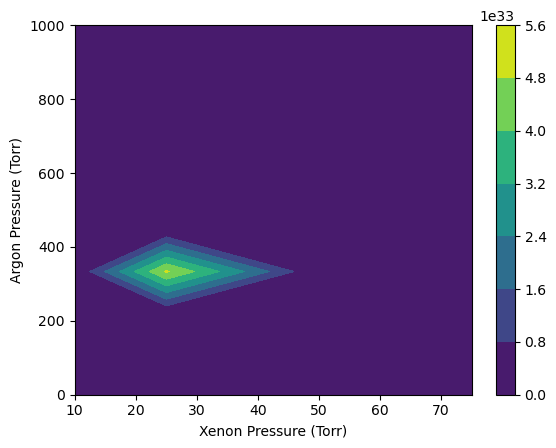

In [7]:
PXe_, PAr_ = np.meshgrid(PXe_int, PAr_int)
plt.contourf(PXe_, PAr_,GBWA[2])
plt.colorbar()
plt.xlabel('Xenon Pressure (Torr)')
plt.ylabel('Argon Pressure (Torr)')
#plt.plot(b,2/b,color='r')
#plt.savefig(NA_Name)

Text(0.5, 1.0, 'Johns Model With Absorption f=75cm')

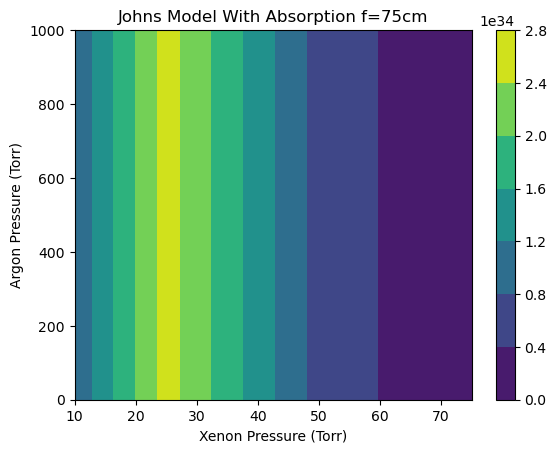

In [99]:
PXe_, PAr_ = np.meshgrid(PXe_int, PAr_int)
plt.contourf(PXe_, PAr_,JWA[2])
plt.colorbar()
plt.xlabel('Xenon Pressure (Torr)')
plt.ylabel('Argon Pressure (Torr)')
plt.title("Johns Model With Absorption f=75cm")
#plt.plot(b,2/b,color='r')
#plt.savefig(NA_Name)

In [89]:
np.max(JWA[1])


1.7128628612306161133e+34

In [ ]:
cp = np.where(JWA[0] == 6.851514755931267984e+33)



print(cp)
#cp_Xe = cp[1][0]
#print(cp_Xe) #max pressure index



(array([], dtype=int64), array([], dtype=int64))


In [ ]:
Opt_Pxe_GBWA= np.array([PXe_int[1],PXe_int[1],PXe_int[1]])
Opt_PAr_GBWA = np.array([PAr_int[6],PAr_int[3],PAr_int[3]])




[]

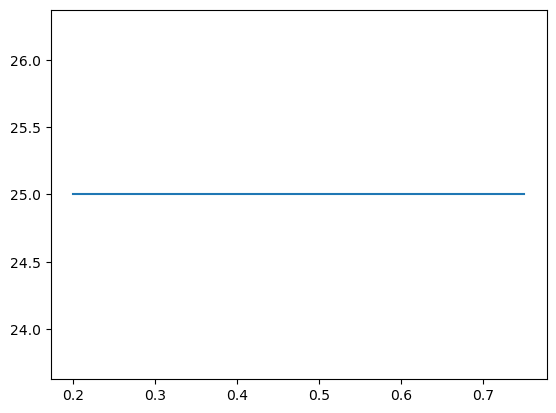

In [ ]:
f_int = b_to_f(omega0,b_int)
plt.plot(f_int,Opt_Pxe_GBWA)
plt.plot()
plt.tittle()

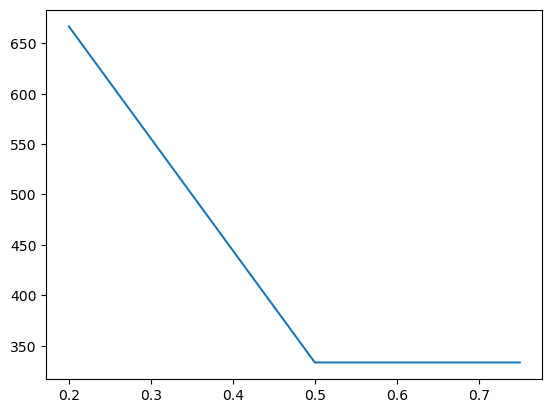

In [ ]:
plt.plot(f_int,Opt_PAr_GBWA)
plt.xlabel()

# Phase Matching Curves With Argon

0
1
2


Text(0, 0.5, '118 Signal')

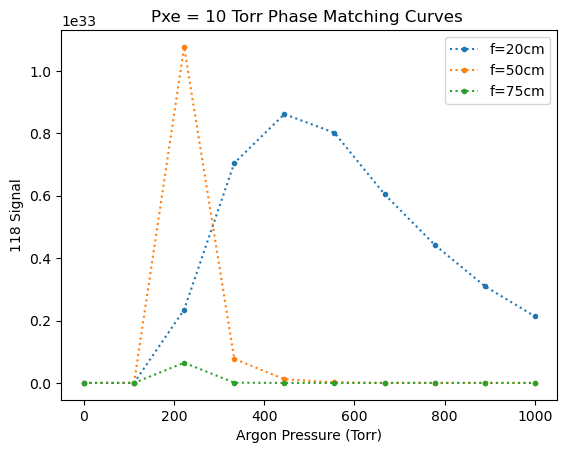

In [39]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,0],linestyle='dotted',marker ='.')

plt.title('Pxe = 10 Torr Phase Matching Curves ')
#plt.xlabel()
plt.legend(['f=20cm','f=50cm','f=75cm'])
plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')

0
1
2


Text(0, 0.5, '118 Signal')

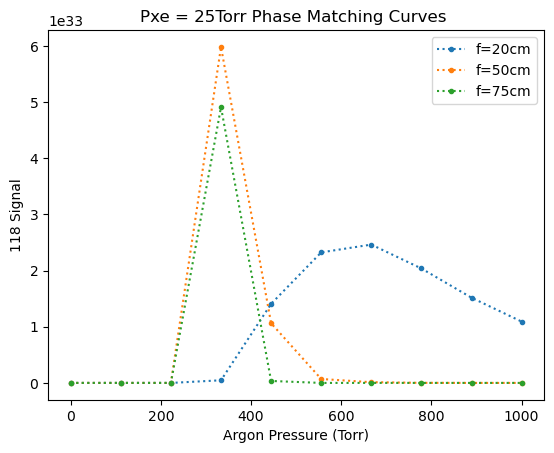

In [38]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,1],linestyle='dotted',marker ='.')

plt.title('Pxe = 25Torr Phase Matching Curves ')
#plt.xlabel()
plt.legend(['f=20cm','f=50cm','f=75cm'])
plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')

0
1
2


Text(0, 0.5, '118 Signal')

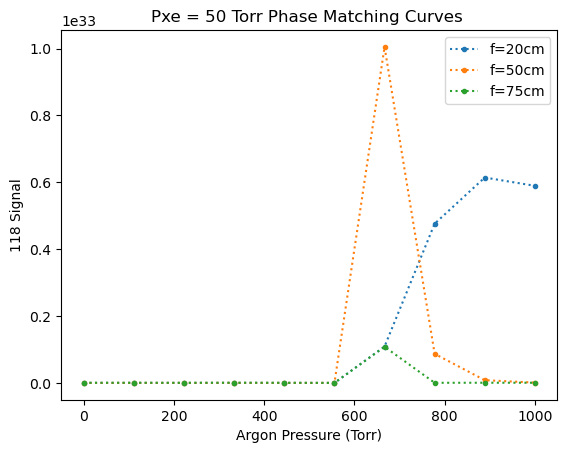

In [41]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,2],linestyle='dotted',marker ='.')

plt.title('Pxe = 50 Torr Phase Matching Curves ')
#plt.xlabel()
plt.legend(['f=20cm','f=50cm','f=75cm'])
plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')

0
1
2


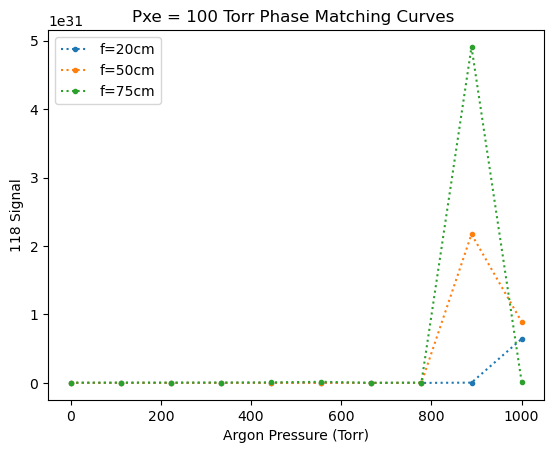

In [44]:

for i in range(0,3):
    print(i)
    plt.plot(PAr_int,GBWA[i][:,3],linestyle='dotted',marker ='.')

plt.title('Pxe = 100 Torr Phase Matching Curves ')
#plt.xlabel()
plt.legend(['f=20cm','f=50cm','f=75cm'])
plt.xlabel('Argon Pressure (Torr)')
plt.ylabel('118 Signal')
plt.show()

# Pressure Xe Curves at Optimal Phase Matching

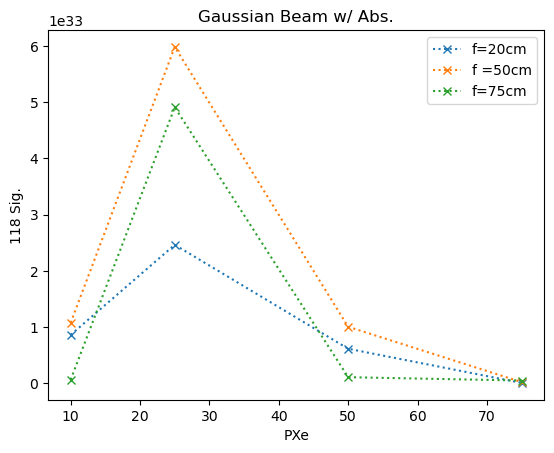

In [22]:
GBWA_PM = GBWA.max(axis =1)

for b_index in range(3):
    plt.plot(PXe_int,GBWA_PM[b_index,:],linestyle = ':',marker = "x")


plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('Gaussian Beam w/ Abs.')
plt.show()

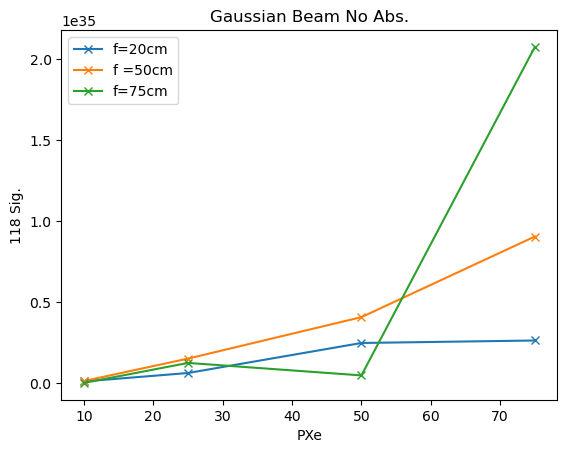

In [23]:
GBNA_PM = GBNA.max(axis =1)

for b_index in range(3):
    plt.plot(PXe_int,GBNA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('Gaussian Beam No Abs.')
plt.show()


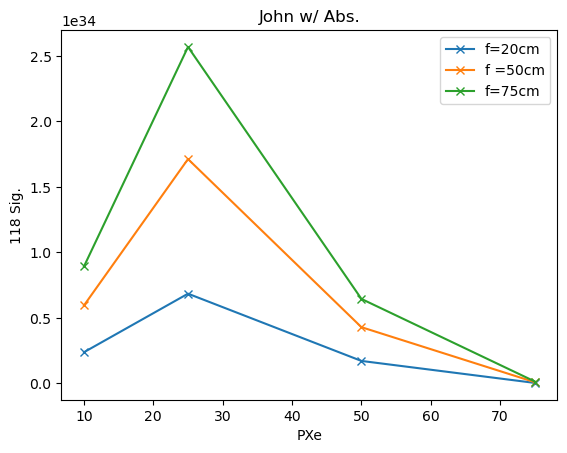

In [31]:
JWA_PM = JWA.max(axis =1)

for b_index in range(3):
    plt.plot(PXe_int,JWA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('John w/ Abs.')
plt.show()

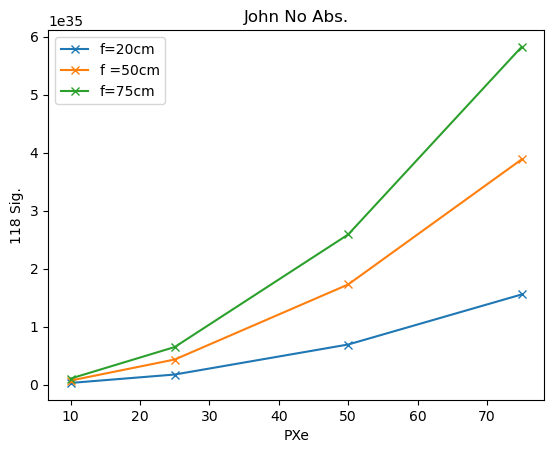

In [33]:
JNA_PM = JNA.max(axis =1)

for b_index in range(3):
    plt.plot(PXe_int,JNA_PM[b_index,:],marker = "x")

plt.legend(['f=20cm','f =50cm','f=75cm'])
plt.xlabel('PXe')
plt.ylabel('118 Sig.')
plt.title('John No Abs.')
plt.show()